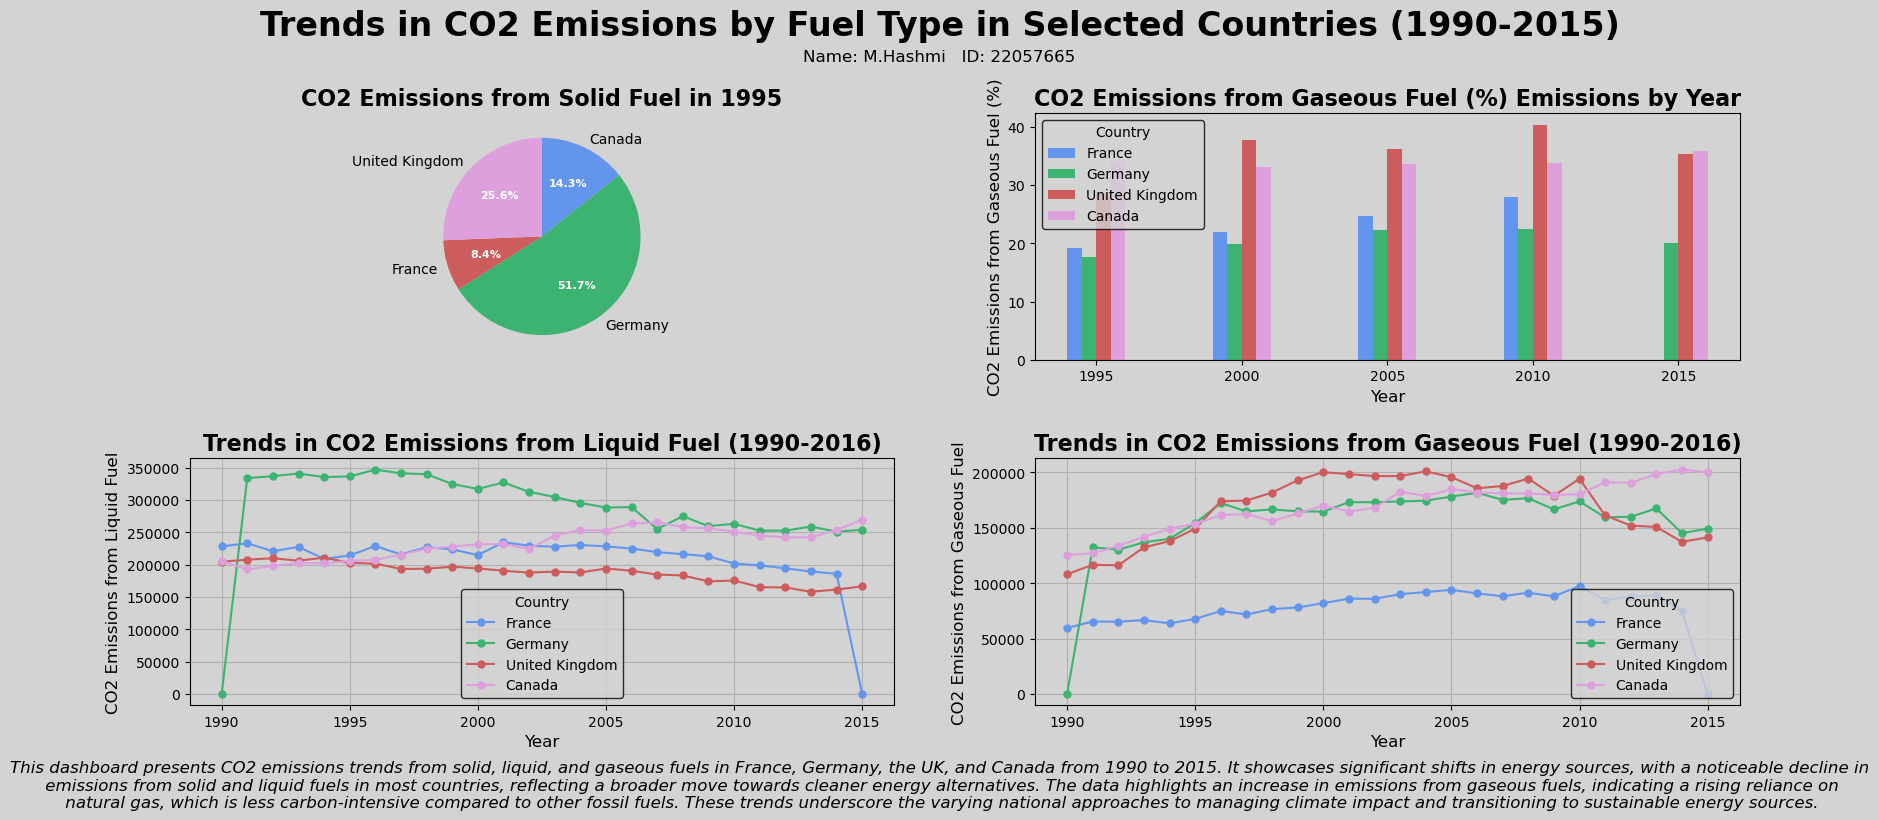

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def load_and_transform_data():
    """Loads and transforms climate data from a CSV file."""
    climate_data = pd.read_csv('World_Climate data.csv', skiprows=4)
    climate_data.drop(columns=['Indicator Code', 'Country Code'], inplace=True)
    climate_data.rename(
        columns={
            'Country Name': 'Country', 
            'Indicator Name': 'Indicator'
        }, inplace=True
    )
    
    for col in climate_data.columns:
        if 'YR' in col:
            new_col_name = col.split('[')[0].strip()
            climate_data.rename(columns={col: new_col_name}, inplace=True)
            climate_data[new_col_name] = pd.to_numeric(
                climate_data[new_col_name], errors='coerce'
            )

    indicator_mapping = {
        'CO2 emissions from gaseous fuel consumption (kt)': 'CO2 Emissions from Gaseous Fuel',
        'CO2 emissions from liquid fuel consumption (kt)': 'CO2 Emissions from Liquid Fuel',
        'CO2 emissions from solid fuel consumption (kt)': 'CO2 Emissions from Solid Fuel',
        'CO2 emissions from gaseous fuel consumption (% of total)': 'CO2 Emissions from Gaseous Fuel (%)'
    }
    climate_data['Indicator'] = climate_data['Indicator'].map(indicator_mapping)
    selected_indicators = list(indicator_mapping.values())
    climate_data = climate_data[climate_data['Indicator'].isin(selected_indicators)]
    return climate_data

def plot_energy_production_pie_chart(ax, data, indicator, year='1995'):
    """Plots a pie chart highlighting energy production data for a specific year."""
    selected_countries = ['France', 'Germany', 'United Kingdom', 'Canada']
    selected_data = data[data['Indicator'] == indicator]
    selected_data = selected_data[selected_data['Country'].isin(selected_countries)]
    selected_data = selected_data[['Country', year]].set_index('Country')
    selected_data[year].fillna(0, inplace=True)
    colors = ['cornflowerblue', 'mediumseagreen', 'indianred', 'plum']
    wedges, texts, autotexts = ax.pie(
        selected_data[year], labels=selected_data.index, autopct='%1.1f%%',
        colors=colors, startangle=90, counterclock=False
    )
    ax.set_title(f'{indicator} in {year}', fontsize=16, fontweight='bold')
    plt.setp(autotexts, size=8, weight='bold', color='white')

def plot_vertical_energy_bars(ax, data, indicator, years=[1995, 2000, 2005, 2010, 2015]):
    """Plots a vertical bar chart comparing data over several years for a specific energy type."""
    selected_countries = ['France', 'Germany', 'United Kingdom', 'Canada']
    year_columns = [str(year) for year in years]
    selected_data = data[data['Indicator'] == indicator]
    selected_data = selected_data[selected_data['Country'].isin(selected_countries)]
    selected_data = selected_data[['Country'] + year_columns].set_index('Country')
    bar_width = 0.1
    colors = ['cornflowerblue', 'mediumseagreen', 'indianred', 'plum']

    for i, country in enumerate(selected_countries):
        values = selected_data.loc[country, year_columns]
        ax.bar(
            [x + i * bar_width for x in range(len(years))], values, label=country,
            color=colors[i], width=bar_width
        )
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(indicator, fontsize=12)
    ax.set_title(f'{indicator} Emissions by Year', fontsize=16, fontweight='bold')
    ax.legend(title='Country')
    ax.set_xticks([x + (len(selected_countries) - 1) * bar_width / 2 for x in range(len(years))])
    ax.set_xticklabels(years)

def plot_energy_production_trends(ax, data, indicator):
    """Plots a line chart showing trends in energy production over time."""
    selected_countries = ['France', 'Germany', 'United Kingdom', 'Canada']
    year_columns = [str(year) for year in range(1990, 2016)]
    filtered_data = data[data['Indicator'] == indicator]
    colors = ['cornflowerblue', 'mediumseagreen', 'indianred', 'plum']

    for i, country in enumerate(selected_countries):
        country_data = filtered_data[filtered_data['Country'] == country]
        if not country_data.empty:
            years_data = country_data.iloc[0][year_columns].fillna(0)
            ax.plot(
                year_columns, years_data, label=country, marker='o',
                linestyle='-', markersize=5, color=colors[i]
            )
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(indicator, fontsize=12)
    ax.set_title(f'Trends in {indicator} (1990-2016)', fontsize=16, fontweight='bold')
    ax.legend(title='Country')
    ax.set_xticks(year_columns[::5])
    ax.grid(True)

# Main script to create plots
df = load_and_transform_data()
fig = plt.figure(figsize=(20, 8), facecolor='lightgrey')
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 4], height_ratios=[1, 1])
plt.subplots_adjust(top=0.85)
fig.suptitle('Trends in CO2 Emissions by Fuel Type in Selected Countries (1990-2015)', fontsize=24, fontweight='bold')
fig.text(0.5, 0.92, "Name: M.Hashmi   ID: 22057665", ha='center', va='center', fontsize=12)
ax1 = plt.subplot(gs[0])
ax1.set_facecolor('lightgrey')
plot_energy_production_pie_chart(ax1, df, 'CO2 Emissions from Solid Fuel')
ax2 = plt.subplot(gs[1])
ax2.set_facecolor('lightgrey')
plot_vertical_energy_bars(ax2, df, 'CO2 Emissions from Gaseous Fuel (%)')
# Customizing legend for Bar Chart
legend = ax2.legend(title='Country', facecolor='lightgray', edgecolor='black')
ax3 = plt.subplot(gs[2])
ax3.set_facecolor('lightgrey')
plot_energy_production_trends(ax3, df, 'CO2 Emissions from Liquid Fuel')
# Customizing legend for Line Plot
legend = ax3.legend(title='Country', facecolor='lightgray', edgecolor='black')
ax4 = plt.subplot(gs[3])
ax4.set_facecolor('lightgrey')
# Customizing legend for Line Plot

plot_energy_production_trends(ax4, df, 'CO2 Emissions from Gaseous Fuel')
legend = ax4.legend(title='Country', facecolor='lightgray', edgecolor='black')
plt.subplots_adjust(wspace=0.2, hspace=0.4)
summary_text = (
    "This dashboard presents CO2 emissions trends from solid, liquid, and gaseous fuels in France, Germany, the UK, "
    "and Canada from 1990 to 2015. It showcases significant shifts in energy sources, with a noticeable decline in\n "
    "emissions from solid and liquid fuels in most countries, reflecting a broader move towards cleaner energy "
    "alternatives. The data highlights an increase in emissions from gaseous fuels, indicating a rising reliance on\n "
    "natural gas, which is less carbon-intensive compared to other fossil fuels. These trends underscore the varying "
    "national approaches to managing climate impact and transitioning to sustainable energy sources."
)
fig.text(0.5, 0.01, summary_text, ha='center', va='center', fontsize=12, style='italic')
plt.savefig('22057665.png', dpi=300, bbox_inches='tight')
